In [20]:
import pandas as pd

In [21]:
stats = pd.read_csv('./stats.csv')

In [22]:
stats

,Unnamed: 0,model,max_depth,n_bits,n_features,training_time,compilation_time,prediction_time,accuracy
0,0,"DecisionTreeClassifier(max_depth=3, n_bits={'o...",3,2,5,0.054199,0.813224,44.796236,0.904
1,1,"DecisionTreeClassifier(max_depth=3, n_bits={'o...",3,2,6,0.043017,0.820355,47.596525,0.892
2,2,"DecisionTreeClassifier(max_depth=3, n_bits={'o...",3,2,7,0.046293,0.840345,48.625328,0.872
3,3,"DecisionTreeClassifier(max_depth=3, n_bits={'o...",3,3,5,0.090206,0.833214,48.240744,0.904
4,4,"DecisionTreeClassifier(max_depth=3, n_bits={'o...",3,3,6,0.042239,0.818858,45.656209,0.892
5,5,"DecisionTreeClassifier(max_depth=3, n_bits={'o...",3,3,7,0.046802,0.898278,48.476720,0.872
6,6,"DecisionTreeClassifier(max_depth=4, n_bits={'o...",4,2,5,0.041295,0.824138,80.045437,0.932
7,7,"DecisionTreeClassifier(max_depth=4, n_bits={'o...",4,2,6,0.072233,0.838812,74.189624,0.916
8,8,"DecisionTreeClassifier(max_depth=4, n_bits={'o...",4,2,7,0.076011,4.248862,78.931771,0.912
9,9,"DecisionTreeClassifier(max_depth=4, n_bits={'o...",4,3,5,0.128105,0.818262,75.561743,0.932


In [23]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

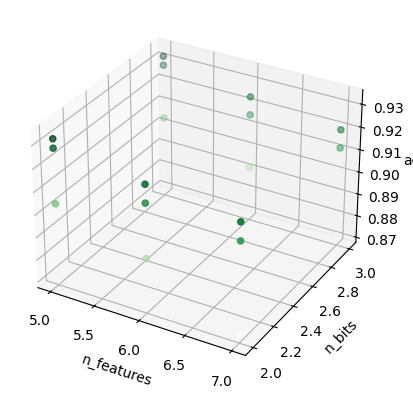

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = stats['n_features']
Y = stats['n_bits']
Z = stats['accuracy']
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens')
ax.set_xlabel('n_features')
ax.set_ylabel('n_bits')
ax.set_zlabel('acc');